In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

np.set_printoptions(precision=4, suppress=True)

(2, 100)

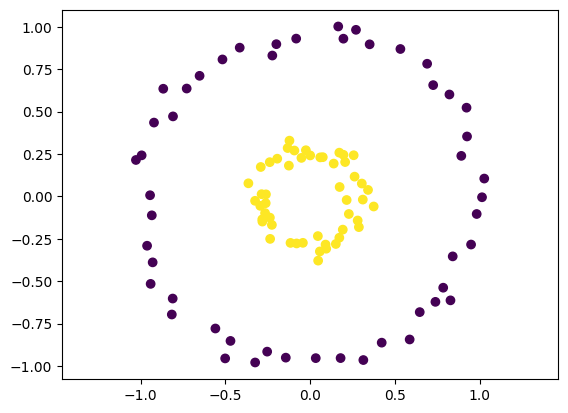

In [2]:
np.random.seed(1)

n = 100
X, y = make_circles(n_samples=n, factor=0.3, noise=0.05)
X = X.T
X.shape

_ = plt.scatter(*X, c=y)
_ = plt.axis("equal")

# normal PCA (don't expect any compression)

In [3]:
C = X @ X.T

eigenvalues, eigenvectors = np.linalg.eigh(C)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

np.cumsum(eigenvalues) / sum(eigenvalues)

array([0.5122, 1.    ])

In [4]:
k = 1
W = eigenvectors[:, :k]

np.float64(0.36072075277011134)

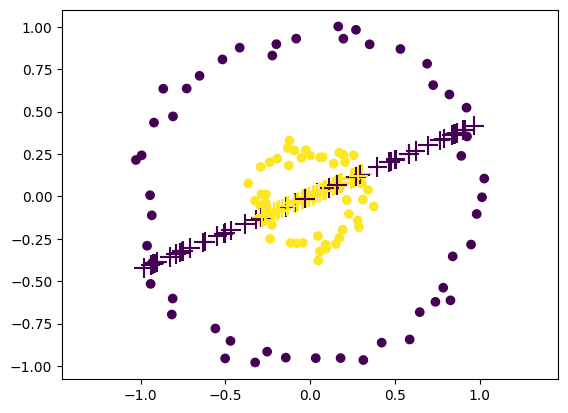

In [5]:
coefficients = X.T @ W
X_ = (coefficients @ W.T).T

np.sqrt(np.mean((X - X_) ** 2))  # rmse

_ = plt.scatter(*X, c=y)
_ = plt.scatter(*X_, marker='+', s=200, c=y)
_ = plt.axis("equal")

# kernel PCA (reveal linear rel. in higher dim. space)

In [40]:
def rbf_kernel(X, gamma=0.0001):
  sq_dist = np.sum(X**2, axis=0, keepdims=True) + \
      np.sum(X**2, axis=0, keepdims=True).T - 2 * X.T @ X

  return np.exp(-gamma * sq_dist)

In [47]:
gamma = 1/2 * np.mean(np.var(X, axis=1))
gamma

np.float64(0.1333544938435088)

In [49]:
K = rbf_kernel(X, gamma=gamma)
K.shape

(100, 100)

In [129]:
lambdas, betas = np.linalg.eigh(K)
sorted_indices = np.argsort(lambdas)[::-1]
lambdas = lambdas[sorted_indices]
betas = betas[:, sorted_indices]

lambdas.shape
betas.shape

(100,)

(100, 100)

In [136]:
np.argmax(np.cumsum(lambdas) / sum(lambdas) >= 0.9999) + 1

np.int64(8)

In [137]:
k = 8

lambdas = lambdas[:k]
betas = betas[:, :k]

lambdas.shape
betas.shape

(8,)

(100, 8)

In [138]:
alphas = betas / np.sqrt(lambdas)
alphas.shape

(100, 8)

In [139]:
coefficients = K @ alphas
coefficients.shape

(100, 8)

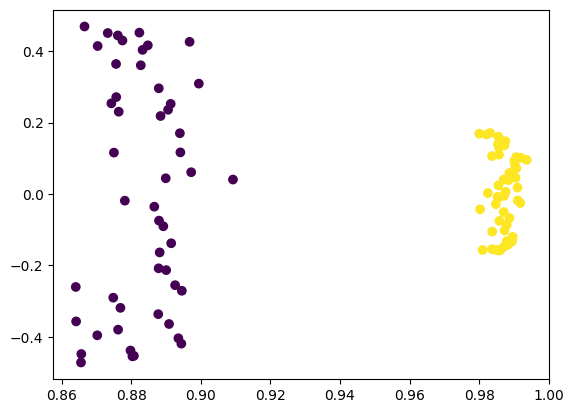

In [140]:
# if k == 1:
#   _ = plt.scatter(coefficients, [0]*n, c=y)

# if k == 2:
#   _ = plt.scatter(*coefficients.T, c=y)

plt.scatter(*coefficients.T[:2], c=y)